# Lab 2: Comparing Means
## w203 Statistics for Data Science

## The Data

The American National Election Studies (ANES) conducts surveys of voters in the United States. 



In [20]:
A = read.csv("anes_pilot_2018.csv")

install.packages("tidyverse")
library(tidyverse)

install.packages("effsize")
library(effsize)

install.packages("ggplot2")
library(ggplot2)

install.packages("e1071")
library(e1071)

install.packages("knitr")
library(knitr)

install.packages("rstatix")
library(rstatix)

install.packages("gridExtra")
library(gridExtra)

install.packages('coin')
library(coin)



The downloaded binary packages are in
	/var/folders/5r/hvmrkbqs7k53lyqrjfblr9k40000gp/T//Rtmp18rOHn/downloaded_packages

The downloaded binary packages are in
	/var/folders/5r/hvmrkbqs7k53lyqrjfblr9k40000gp/T//Rtmp18rOHn/downloaded_packages

The downloaded binary packages are in
	/var/folders/5r/hvmrkbqs7k53lyqrjfblr9k40000gp/T//Rtmp18rOHn/downloaded_packages

The downloaded binary packages are in
	/var/folders/5r/hvmrkbqs7k53lyqrjfblr9k40000gp/T//Rtmp18rOHn/downloaded_packages

The downloaded binary packages are in
	/var/folders/5r/hvmrkbqs7k53lyqrjfblr9k40000gp/T//Rtmp18rOHn/downloaded_packages

The downloaded binary packages are in
	/var/folders/5r/hvmrkbqs7k53lyqrjfblr9k40000gp/T//Rtmp18rOHn/downloaded_packages

The downloaded binary packages are in
	/var/folders/5r/hvmrkbqs7k53lyqrjfblr9k40000gp/T//Rtmp18rOHn/downloaded_packages


also installing the dependencies ‘zoo’, ‘TH.data’, ‘sandwich’, ‘libcoin’, ‘modeltools’, ‘mvtnorm’, ‘multcomp’





The downloaded binary packages are in
	/var/folders/5r/hvmrkbqs7k53lyqrjfblr9k40000gp/T//Rtmp18rOHn/downloaded_packages


Loading required package: survival


Attaching package: ‘coin’


The following objects are masked from ‘package:rstatix’:

    chisq_test, friedman_test, kruskal_test, sign_test, wilcox_test




# Research Questions

## Question 1: Do US voters have more respect for the police or for journalists?

### Introduce your topic briefly.
The survey used a feeling thermometer to measure favorable/unfavorable feeling towards the police and journalists. Positive feelings are labeled as warm feelings and negative feelings are equivalent to cold feelings. The underlying assumption of thermometer scales is based in information theory and more precise information can be obtained if respondents can give their answer in a continuum or in a large number of categories. 
 It is found that there is no consensus to consider feeling temperature as interval data or ordinal data - we will explore feeling temperature as both ordinal data and interval data and show that the results could be similar for large samples.  The feeling temperature is ordinal data because warm and cold feelings are subjective. It can also be considered as interval because of the large number of categories that break the subjectiveness to some extent.

 The respect is borne out of several factors and often favorable feeling implies more respect. 
The parameters ftpolice and ftjournal are used to measure feelings towards police & journalists, respectively.
The ftpolice/ftjournal value of 100 means the highest respect, and value of 0 means contempt.  The value 50 means a neutral position with no respect/contempt.
 
 We use ftpolice and ftjournal as a measure of feeling/respect.
 
 The following variables are operationalized 

| Variables |Description |Values |
| --- | --- | --- |
| ftpolice | Feeling Thermometer Values for Police | [0,1,..99,100] |
| --- | --- | --- |
|  ftjournal | Feeling Thermometer Values for journals |[0,1,..99,100] |


Potential Gap:
  1. The operationalized variable "favourable feeling" is used as the measure of our concept "respect", and this might not might not be the same idea all the time.

### Perform an exploratory data analysis (EDA) of the relevant variables. 


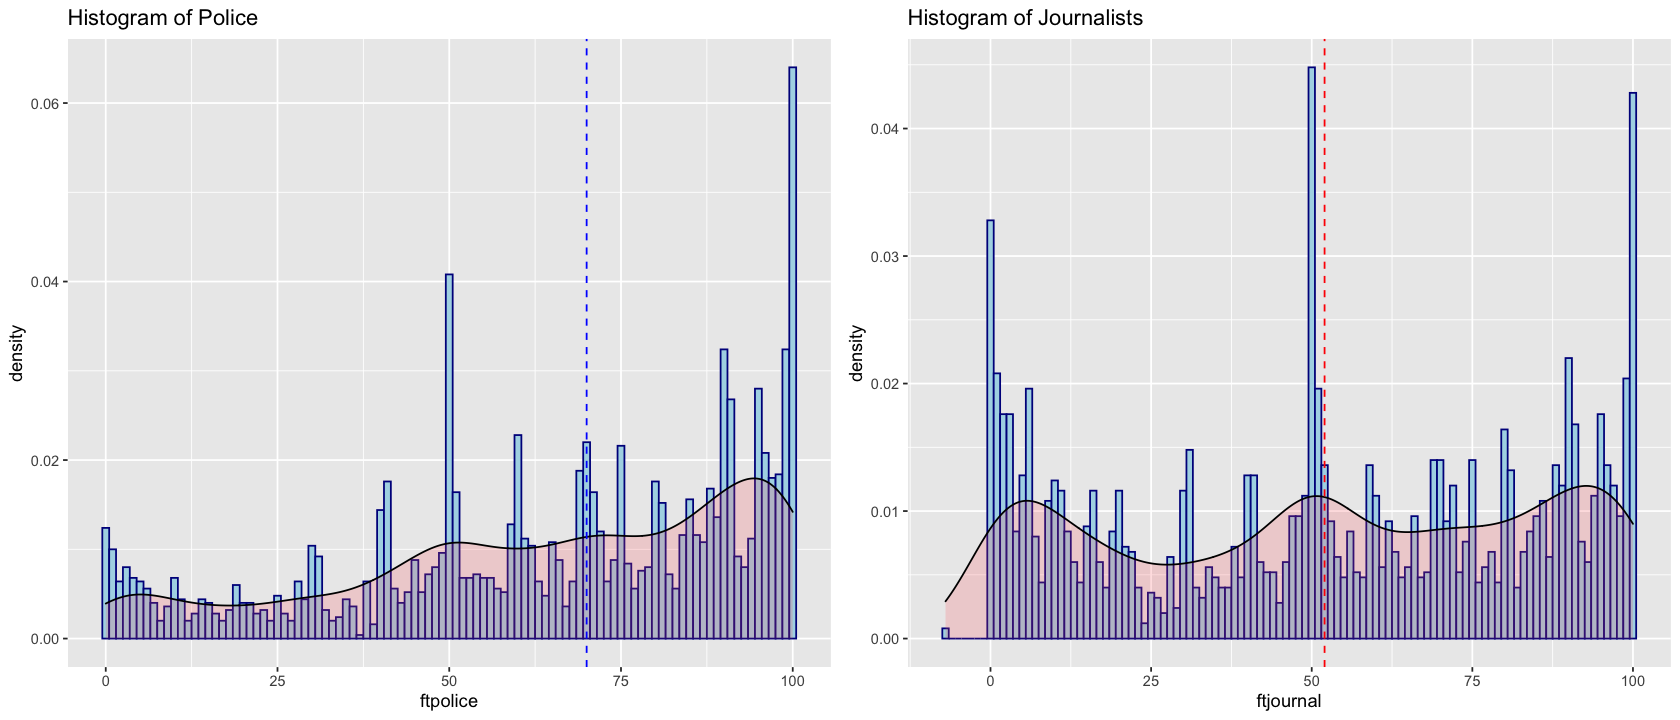

In [21]:
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

fig(14, 6)

hist_1 <- ggplot(A, aes(x = ftpolice)) +
  geom_histogram(aes(y=..density..),colour="darkblue", fill="lightblue", binwidth = 1.0) +
  geom_density(alpha=.2, fill="#FF6666") +
  geom_vline(xintercept = median(A$ftpolice), color='blue', linetype=2) +
  labs(title = 'Histogram of Police')

hist_2 <- ggplot(A, aes(x = ftjournal)) +
  geom_histogram(aes(y=..density..),colour="darkblue", fill="lightblue", binwidth = 1.0) +
  geom_density(alpha=.2, fill="#FF6666") +
  geom_vline(xintercept = median(A$ftjournal), color='red', linetype=2) +
  labs(title = 'Histogram of Journalists')

 
grid.arrange(hist_1, hist_2, ncol=2)


In [22]:
table = matrix(NA, nrow=3, ncol=2)
colnames(table) = c("Police", "Journalists")
rownames(table) = c("Median", "Skewness", "Kurtosis")

# Avoid -7 
pol_jurno = subset(A, A$ftpolice >=0)
pol_jurno = subset(pol_jurno, pol_jurno$ftjournal >=0)

table[1,1] = format(median(pol_jurno$ftpolice), digits=4, nsmall=1)
table[1,2] = format(median(pol_jurno$ftjournal), digits=4, nsmall=1)
table[2,1] = format(skewness(pol_jurno$ftpolice), digits=2, nsmall=1)
table[2,2] = format(skewness(pol_jurno$ftjournal), digits=2, nsmall=1)
table[3,1] = format(kurtosis(pol_jurno$ftpolice), digits=2, nsmall=1)
table[3,2] = format(kurtosis(pol_jurno$ftjournal), digits=2, nsmall=1)


kable(table, format="pipe", caption="Police vs Journalists")




Table: Police vs Journalists

|         |Police |Journalists |
|:--------|:------|:-----------|
|Median   |70.0   |52.0        |
|Skewness |-0.64  |-0.14       |
|Kurtosis |-0.6   |-1.3        |

The histogram of police and journalists show spikes at 50 and 100 implying clusters at neutral feeling and high respect. The histogram of journalists show a spike at 0 implying cluster at cold feeling (contempt).

The histogram of police show some skew towards right/more respect (median/more people above mean).

The negative kurtosis indicates non-normal distribution and higher negative kurtosis of journalists indicates a tendency to form a uniform distribution.

There were some participants who had no answer(-7) for ftjournal, and we did not include these two participants in our analysis of this question.

### Based on your EDA, select an appropriate hypothesis test. 
 
 The majority of null hypothesis take the form of equality statements ($=$ or $<=$ or $>=$) and we have two options for testing more or less criteria.

Option 1:

 $H_0 :$ Police have more or equal respect compared to journalists
 
 $H_1 :$ Police have less respect compared to journalists
 
 
Option 2:

 $H_0 :$ Police have less or equal respect compared to journalists
 
 $H_1 :$ Police have more  respect compared to journalists
 
 
 We will go with Option 2 and two sample/one-tailed Wilcoxon Rank Sum test for statistical significance.  The feeling for Police and Journalists are considered independent and not paired. 
 We also compared the mean values ftpolice and ftjournal in one tailed, two-sample t-tests.
 
 The correlation test was not meaningful to test more or fewer criteria, and hence we used cohen's d test for practical significance.
 
 Note that we are trying both parametric and non-parametric tests because there is no consensus on treating feeling thermometer data as interval or ordinal data.


### Conduct your test.

In [23]:
wilcox.test(pol_jurno$ftpolice, pol_jurno$ftjournal, alternative = "greater")


	Wilcoxon rank sum test with continuity correction

data:  pol_jurno$ftpolice and pol_jurno$ftjournal
W = 3797068, p-value < 2.2e-16
alternative hypothesis: true location shift is greater than 0


The p-value is found to be very low and statistically significant. Hence the Null Hypothesis $H_0$(Police have less or equal respect compared to journalists) is rejected.

In [24]:
t.test(pol_jurno$ftpolice, pol_jurno$ftjournal, alternative = "greater")


	Welch Two Sample t-test

data:  pol_jurno$ftpolice and pol_jurno$ftjournal
t = 14.213, df = 4920.9, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 10.92463      Inf
sample estimates:
mean of x mean of y 
 64.66653  52.31185 


We also ran two sample, one tailed parametric t-test and got similar p-value as the Wilcoxon test. This is because Wilcoxon implementation uses normal approximation when sample size is large.  We can see high degree of freedom in t-tests—even the t-test results in rejection of the Null Hypothesis.

In [25]:
cohen.d(A$ftpolice, A$ftjournal, pooled=TRUE)


Cohen's d

d estimate: 0.4041218 (small)
95 percent confidence interval:
    lower     upper 
0.3481091 0.4601345 


The d estimate is 0.4. It implies two groups' means don't differ by 0.4 times the standard deviations or more and it is practically not significant even if it is statistically significant.

## Question 2: Are Republican voters older or younger than Democratic voters?

### Introduce your topic briefly
The ANES survey asked participants if they think of themselves as Republican or Democrats. We used this information along with how they voted in Senate and Governor elections to establish that indeed voted on party lines and can be considered as Republican Voters or Democratic Voters.

The birth year (birthyr) is chosen to determine the age of the participants and we used 2018 as a reference to tranform birthyr to age of the voters. The age is a metric type of data and parametric tests for comparing means can be used. 
 
We used pid1r and pid2d information to decide Democratic voters or Republican voters.


The following variables are operationalized 

| Variables | Description | Values |
| --- | --- | --- |
| pid1r/pid1d | Think themselves as Republican or Democrats | [1,2,3,4,5] |
| --- | --- | --- |
|  senate18t/senate18p | Voted in 2018 Senate election as Democrats or Republican | [1,2,3] |
| --- | --- | --- |
| gov/18t/gov18p | Voted in 2018 Gov election as Democrats or Republican  |[1,2,3] |
| --- | --- | --- |
| birthyr | Year of birth  | [1927,..2000] |



In [26]:
repordem = rbind(subset(A, (A$pid1r == 2) | (A$pid1r == 1)), subset(A, (A$pid1d == 2) |(A$pid1d == 1)))


senate = subset(repordem, repordem$senate18t==1)
x = senate$senate18p
y = -1*senate$pid1d*senate$pid1r
sen_corr = cor(x,y)

gov = subset(repordem, repordem$gov18t==1)
x = gov$gov18p
y = -1*gov$pid1d*gov$pid1r
gov_corr = cor(x,y)

table = matrix(NA, nrow=2, ncol=1)
colnames(table) = c("Dem Or Rep")
rownames(table) = c("Senate Election ", "Gov Election")

table[1,1] = format(sen_corr, digits=3, nsmall=1)
table[2,1] = format(gov_corr, digits=3, nsmall=1)

kable(table, format="pipe", caption="Correlation of voting on party lines")



Table: Correlation of voting on party lines

|                |Dem Or Rep |
|:---------------|:----------|
|Senate Election |0.903      |
|Gov Election    |0.852      |

The information on how they voted in 2018 US Senate and Governors election shows strong correlation to participants identifying themselves as Republican or Democrats as given above.

### Perform an exploratory data analysis (EDA) of the relevant variables.


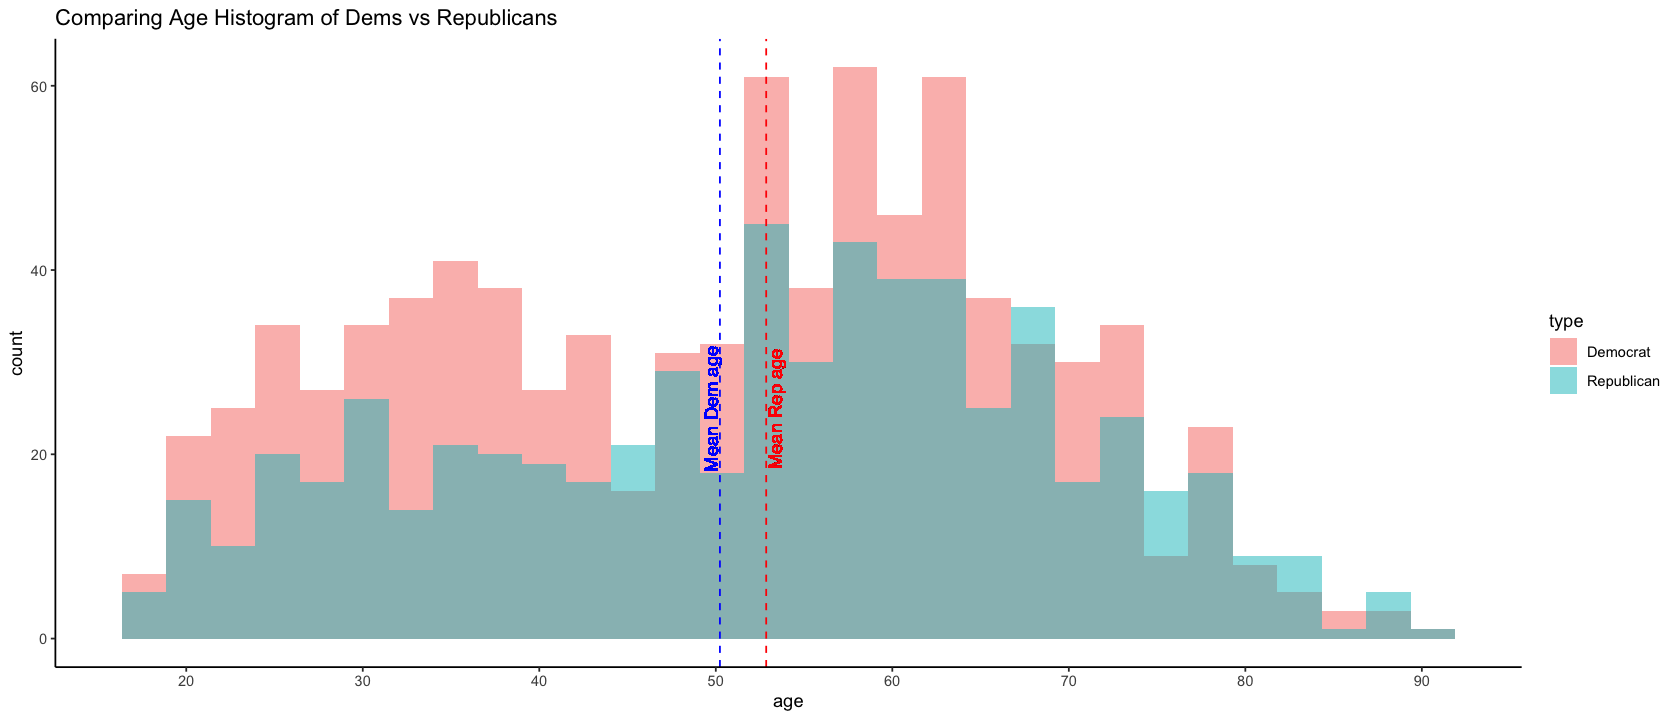

In [27]:
repub = rbind(subset(A, A$pid1r==2), subset(A, A$pid1d==2))
dem = rbind(subset(A, A$pid1r==1), subset(A, A$pid1d==1))

fig(14, 6)

rep_age <- data.frame(type = "Republican", age = (2018-repub$birthyr))
dem_age <- data.frame(type = "Democrat", age = (2018-dem$birthyr))
df <- rbind(dem_age, rep_age)
ggplot(df, aes(x=age, fill = type)) + 
   geom_histogram(alpha = .5, bins = 30, position = "identity") + 
   geom_vline(xintercept = mean(dem_age$age), color='blue', linetype=2) +
   geom_text(aes(x=mean(dem_age$age)-1, label="Mean Dem age", y=25), colour="blue", angle=90, vjust = 1.2)+
   geom_text(aes(x=mean(rep_age$age), label="Mean Rep age", y=25), colour="red", angle=90, vjust = 1.2)+
   geom_vline(xintercept = mean(rep_age$age), color='red', linetype=2) +
   scale_x_continuous(
    breaks=seq(10,100,10), 
    labels = seq(10,100,10),
    ) +
   labs(title = 'Comparing Age Histogram of Dems vs Republicans') +
   theme_classic()

In [28]:
table = matrix(NA, nrow=5, ncol=2)
colnames(table) = c("Democrats", "Republican")
rownames(table) = c("Mean", "Median", "Skewness", "Kurtosis", "Sample Size")

table[1,1] = format(mean(dem_age$age), digits=4, nsmall=1)
table[1,2] = format(mean(rep_age$age), digits=4, nsmall=1)
table[2,1] = format(median(dem_age$age), digits=4, nsmall=1)
table[2,2] = format(median(rep_age$age), digits=4, nsmall=1)
table[3,1] = format(skewness(dem_age$age), digits=2, nsmall=1)
table[3,2] = format(skewness(rep_age$age), digits=2, nsmall=1)
table[4,1] = format(kurtosis(dem_age$age), digits=2, nsmall=1)
table[4,2] = format(kurtosis(rep_age$age), digits=2, nsmall=1)
table[5,1] = format(length(dem_age$age), digits=4, nsmall=1)
table[5,2] = format(length(rep_age$age), digits=4, nsmall=1)


kable(table, format="pipe", caption="Dem vs Rep Age in Years")



Table: Dem vs Rep Age in Years

|            |Democrats |Republican |
|:-----------|:---------|:----------|
|Mean        |50.23     |52.86      |
|Median      |53.0      |55.0       |
|Skewness    |-0.1      |-0.23      |
|Kurtosis    |-0.97     |-0.79      |
|Sample Size |857       |609        |

The histogram of Democrats and Republican ages are plotted above. The negative kurtosis indicates a non-normal distribution with tendency to form uniform-like distribution. For age distribution with outliers, the median is a better measure and there are no outliers in this sample. In this case, the difference between mean and median small, and we use two sample, one-tailed t-test comparing means. The samples are assumed to be independent, and the sample sizes are large enough to justify t-tests. Note that the sample sizes are different for the two samples.

### Based on your EDA, select an appropriate hypothesis test.  
Because of higher mean/median values and more negative skewness of Republican voters in the histogram, we define the hypothesis testing as below.

 $H_0 :$ Average age of Republican voters is higher or same as Democrats
 
 $H_1 :$ Average age of Republican voters is less than Democrats

The null hypothesis is intuitive from the histogram as the skewness of republican age is more negative, implying more people are on the right of the mean.

The two sample, independent, one tailed t-test is used for statistical significance. The Republican and Democratic voters are independent and not paired.

We used Effect Size Cohen's d test to measure practical significance. This test is based on difference between the mean ages of Republican's and Democrats.

### Conduct your test. 

In [29]:
t.test(rep_age$age, dem_age$age, alternative = "less")


	Welch Two Sample t-test

data:  rep_age$age and dem_age$age
t = 2.939, df = 1309.7, p-value = 0.9983
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
     -Inf 4.090677
sample estimates:
mean of x mean of y 
 52.85550  50.23337 


The $95\%$ confidence interval is chosen and p-value is found to very high (0.99). It implies the observations are not statitistically significant and hence fail to reject Null Hypothesis $H_0$(Average age of Republican voters is higher or same as Democrats).

In [30]:
cohen.d(rep_age$age, dem_age$age)


Cohen's d

d estimate: 0.155755 (negligible)
95 percent confidence interval:
     lower      upper 
0.05163986 0.25987016 


The cohen's d estimate is 0.15. It implies two groups' means (average ages) don't differ by 0.15 standard deviations or more and it is practically not significant.

## Question 3: Do a majority of independent voters believe that the federal investigations of Russian election interference are baseless?

### Introduce your topic briefly.


The following variables are operationalized. All the variables are considered as Ordinal type due to subjective nature of the answers and non-parametric tests are used.

| Variables | Description | Values
| --- | --- | --- |
| russia16 | Russia interfered/did not interfere in 2016 election| [1,2] |
| --- | --- | --- |
| coord16 | Trump Campaign Coordinated with Russians in 2016 election| [1,2] |
| --- | --- | --- |
| muellerinv | Approval for Robert Mueller’s investigation of Russian interference  | [1,2,..6,7] |
| --- | --- | --- |
|  pid1r/pid1d | To decide if voter registered as Independent | [1,2,3,4,5] |

 


First, we will check the feeling of independent voters regarding Russian interference in 2016 election. Then we check independent voters approval for FBI investigation of Russian Interference.

Given the strong correlation (0.81) between russia16 and coord16, we only consider russia16 parameter and use the transformation $I = russia16-1$ for a Bernoulli random variable (I) that takes value 0 and 1.

$I = 0 :$ Russia Interfered in 2016 election

$I = 1 :$ Russia did not Interfere in 2016 election 

The approval/disaproval of independent voters (muellerinv) is used to measure the belief that FBI/Mueller investigations are not baseless/baseless.

Potential Gap :

  1. The parameters ftmueller and ftfbi could have provided more insight but we did not include them to keep the analysis simple. 
  
  2. We assumed independent voters knew Mueller was leading federal investigation so that muellerinv can be used to make inferences about federal(FBI) investigation. In other words, this analysis might miss cases where one agrees that the federal investigation is not baseless, but disagrees that Mueller is leading the investigation.

### Perform an exploratory data analysis (EDA) of the relevant variables.

[1] "Correlation between russian16 and coord16 is: 0.81"


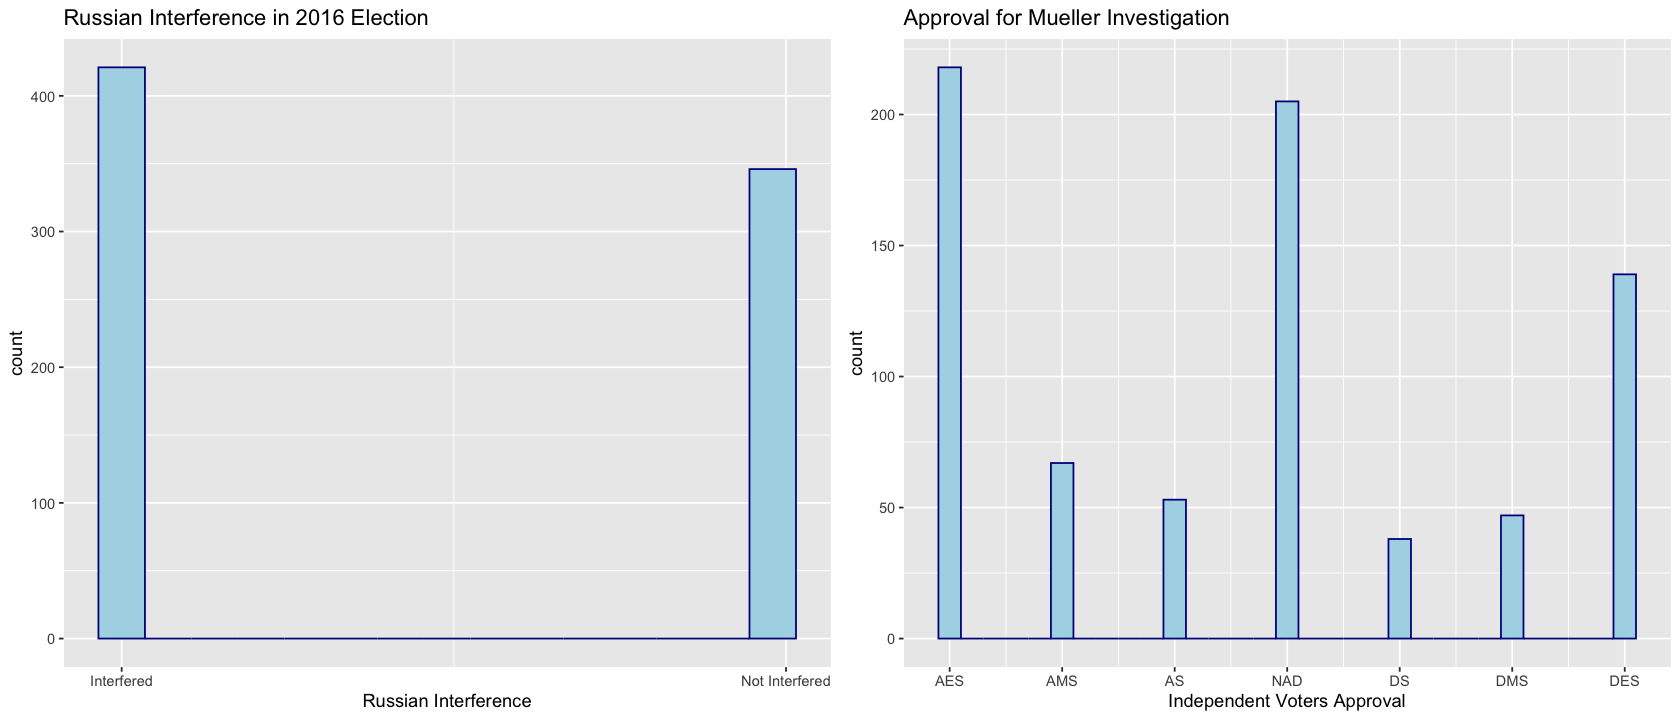

In [31]:
independ = rbind(subset(A, A$pid1r==3), subset(A, A$pid1d==3))
x = independ$russia16 - 1
y = independ$coord16 - 1
print(paste("Correlation between russian16 and coord16 is:",format(cor(x,y), digits=2, nsmall=1)))


fig(14,6)
hist_1 <- ggplot(data = independ) +
  geom_histogram(mapping = aes(x = russia16-1), binwidth = 0.07, colour = "darkblue", fill="lightblue") +
  xlab("Russian Interference") +
  scale_x_continuous(
    breaks=c(0,1), 
    labels = c("0"="Interfered","1"="Not Interfered")
    ) +
  labs(title = 'Russian Interference in 2016 Election')

  hist_2 <- ggplot(data = independ) +
  geom_histogram(mapping = aes(x = muellerinv), binwidth = 0.2, colour = "darkblue", fill="lightblue") +
  scale_x_continuous(
    breaks=seq(1,7,1), 
    labels = c("1"="AES", "2"="AMS", "3"="AS", "4"="NAD", "5"="DS", "6"="DMS", "7"="DES")
    ) +
  xlab("Independent Voters Approval") +
  labs(title = 'Approval for Mueller Investigation')

grid.arrange(hist_1, hist_2, ncol=2)



| Labels | Description 
| --- | --- 
| AES | Approve Extremely Strongly
| --- | --- 
| AMS | Approve Moderately Strongly
| --- | --- 
| AS | Approve Slightly
| --- | --- 
| NAD  | Neither Approve or Disprove
| --- | --- 
| DS | Disaprove Slightly
| --- | --- 
| DMS | Disaprove Moderately Strongly
| --- | --- 
| DES  | Disaprove Extremely Strongly




The histogram of Interference (I) shows more independent voters think Russia probably interfered in 2016 election.

The approval for Mueller's investigation (muellerinv) for Russian Interference is considered as ordinal data.  The histogram of muellerinv shows high frequency/count at Strong Approval and Neutral positions.

### Based on your EDA, select an appropriate hypothesis test. 
We defined two non-parametric hypothesis test - first one to check if independents thought Russia interfered in 2016 election. The second one about their belief in FBI investigation of this matter. 

We define one sample, one tailed binomial sign test to infer what independent voters think about Russian interefernce in 2016 election. 
 
 The hypothesis is defined as Independent voters thinking - 

$H_0 :$  Russia did not interfere in 2016 election

$H_1 :$  Russia interfered in 2016 election

 Then second hypothesis test is non-parametric test based on approval/disaproval of independent voters (muellerinv)  
We define the second hypothesis testing as below.

 $H_0 :$ Independent voters are Neutral or Disaprove FBI investigation(believe investigations are basesless)
 
 $H_1 :$ Independent voters are Approve FBI investigation(believe they are not basesless)

We used Wilcoxon Rank Sum test and it is run as one tailed test with neutral(mean) position at 4.
We proposed non-parametric Wilcoxon Rank Sum test because the approval data is subjective ordinal data. Also the distribution could be multi-modal and also non-normal.

We could not come up with correlation test to check practical significance and hence used r value in Mann–Whitney U test for effect size.


### Conduct your test. 

In [32]:
russia16 = independ$russia16-1
binom.test(x=sum(russia16), n=length(russia16), p=0.5, alternative="less")


	Exact binomial test

data:  sum(russia16) and length(russia16)
number of successes = 346, number of trials = 767, p-value = 0.00375
alternative hypothesis: true probability of success is less than 0.5
95 percent confidence interval:
 0.0000000 0.4814164
sample estimates:
probability of success 
             0.4511082 


The p-value of 0.00375 is statistically significant and we reject the null hypothesis of majority of independent voters thinking federal investigation of Russian interefere in 2016 election are baseless (i.e, neutral or disaprove).


In [33]:
wilcox.test(independ$muellerinv, mu = 4, alternative = "less")


	Wilcoxon signed rank test with continuity correction

data:  independ$muellerinv
V = 62104, p-value = 2.445e-06
alternative hypothesis: true location is less than 4


The p-value of 2.445e-06 is statistically significant and we reject the null hypothesis that independent voters do not believe FBI investigations for Russian interference are baseless/neutral.

In summary, the inferences from binomial sign test and Wilcoxon sign rank tests are consistent. The sign test rejected the hypothesis that independent voters think Russians did not interefere and Wilcoxon test rejecting their belief that FBI investigations are baseless.

In [34]:
wilcox_effsize(independ, muellerinv ~ 1, mu = 4)

,.y.,group1,group2,effsize,n,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<ord>
1,muellerinv,1,null model,0.1727161,767,small


We used r value in One sample Mann–Whitney U for measuring practical significance. The r value is 0.173 (<0.3) and hence effect size is small (practically not significant even though statistically significant).

## Question 4: Was anger or fear more effective at driving increases in voter turnout from 2016 to 2018?

### Introduce your topic briefly.  
The following variables are operationalized 

| Variables | Description | Values 
| --- | --- | --- |
| turnout18 | Turnout in 2018 | [1,2,..,5] |
| --- | --- | --- |
| turnout16 | Turnout in 2016  | [1,2,3] |
| --- | --- | --- |
|  dtangry/geangry | How angry one feels | [1,2,3,4,5] |
| --- | --- | --- |
|  dtafraid/geafraid | How afraid/fear one feels | [1,2,3,4,5] |

 

The turnout18 and turnout16 are used to measure voter turnout in 2018 and 2016 resp.  There are three emotion batteries - Global Emotion Battery, Donald Trump Emotion Battery and Policy Specific Emotion Battery.  We feel Trump Emotion Battery could impact voting in the Presidential Election. The emotion battery - on the scale of 1 to 5 is used to measure anger and fear factors. 

We performed one transformation - consolidate different voting methods of turnout18 into one so that it matches turnout16 format.

We removed some of the outliers (-7) that indicated no answers to emotion battery questions. This should be fine as it did not impact the sample size and the value - no answer cannot be used in our analysis.

Potential Gap:
 1. The number of people who were not sure how they voted is small and not included in our analysis.
 2. We only considered Trump Emotion battery and did not include General and Policy Emotion Battery. 
 3. Interpretation of the Question: We interpreted the question to answer which emotion - anger or fear was more effective in increasing the voter turnout.
 4. We used being afraid as the measure of fear and did not consider other variables (geworry, gebitter etc).

In [35]:
for (i in 1:length(A$turnout18)){
    if(A$turnout18[i] <=3) A$turnout18[i] = 1
    else A$turnout18[i] = A$turnout18[i] - 2
}    

[1] "The difference in number of participants voted in 2018 and 2016 is: 1"


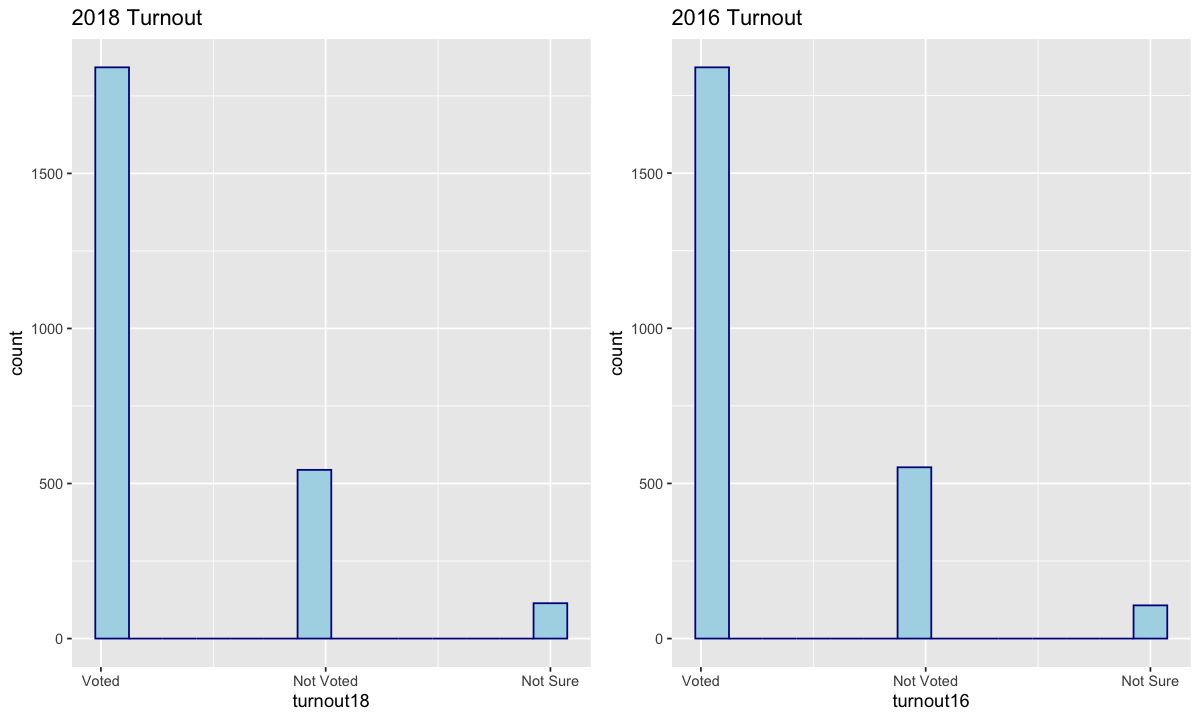

In [36]:
fig(10,6)
hist_1 <- ggplot(data = A) +
  geom_histogram(mapping = aes(x = turnout18), binwidth = 0.15, colour = "darkblue", fill="lightblue") +
  scale_x_continuous("turnout18", breaks = c(1,2,3), labels = c("1"="Voted", "2"="Not Voted", "3"="Not Sure")) +
  labs(title = '2018 Turnout')

  hist_2 <- ggplot(data = A) +
  geom_histogram(mapping = aes(x = turnout16), binwidth = 0.15, colour = "darkblue", fill="lightblue") +
  scale_x_continuous("turnout16", breaks = c(1,2,3), labels = c("1"="Voted", "2"="Not Voted", "3"="Not Sure")) +
  labs(title = '2016 Turnout')

grid.arrange(hist_1, hist_2, ncol=2)
diff_vote = length(A$turnout18[A$turnout18==1]) - length(A$turnout16[A$turnout16==1])
print(paste("The difference in number of participants voted in 2018 and 2016 is:", diff_vote))

### Perform an exploratory data analysis (EDA) of the relevant variables.
The histograms show how participants voted in 2016 and 2018, and we can see that difference between the number of people who voted in 2018 and 2016 is just 1 (out of 1842).  So, there was no significant increase in voter turnout in the overall population. However, we found a subgroup who did not vote in 2016 but voted in 2018, and we considered this subgroup to study how anger or afraid contributed to turnout.  

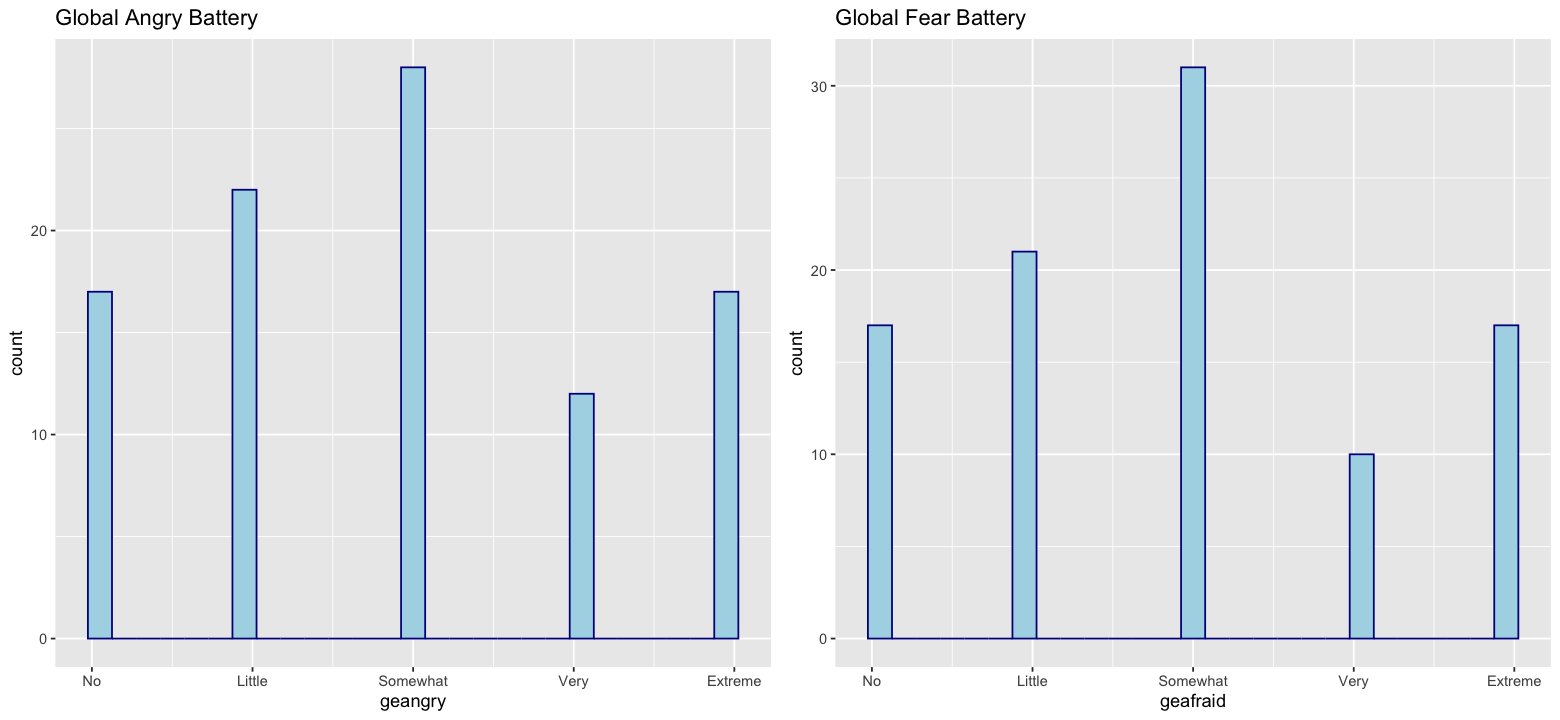

In [37]:
voted18_no16 = subset(A, (A$turnout16 == 2) & (A$turnout18 == 1))
voted18_no16 = subset(voted18_no16, voted18_no16$geafraid>0)
voted18_no16 = subset(voted18_no16, voted18_no16$geangry>0)

fig(13,6)
hist_1 <- ggplot(data = voted18_no16) +
  geom_histogram(mapping = aes(x = geangry), binwidth = 0.15, colour = "darkblue", fill="lightblue") +
  scale_x_continuous("geangry", breaks = c(1,2,3,4,5), labels = c("1"="No", "2"="Little", "3"="Somewhat", "4"="Very", "5"="Extreme")) +
  labs(title = 'Global Angry Battery')

  hist_2 <- ggplot(data = voted18_no16) +
  geom_histogram(mapping = aes(x = geafraid), binwidth = 0.15, colour = "darkblue", fill="lightblue") +
  scale_x_continuous("geafraid", breaks = c(1,2,3,4,5), labels = c("1"="No", "2"="Little", "3"="Somewhat", "4"="Very", "5"="Extreme")) +
  labs(title = 'Global Fear Battery')

grid.arrange(hist_1, hist_2, ncol=2)


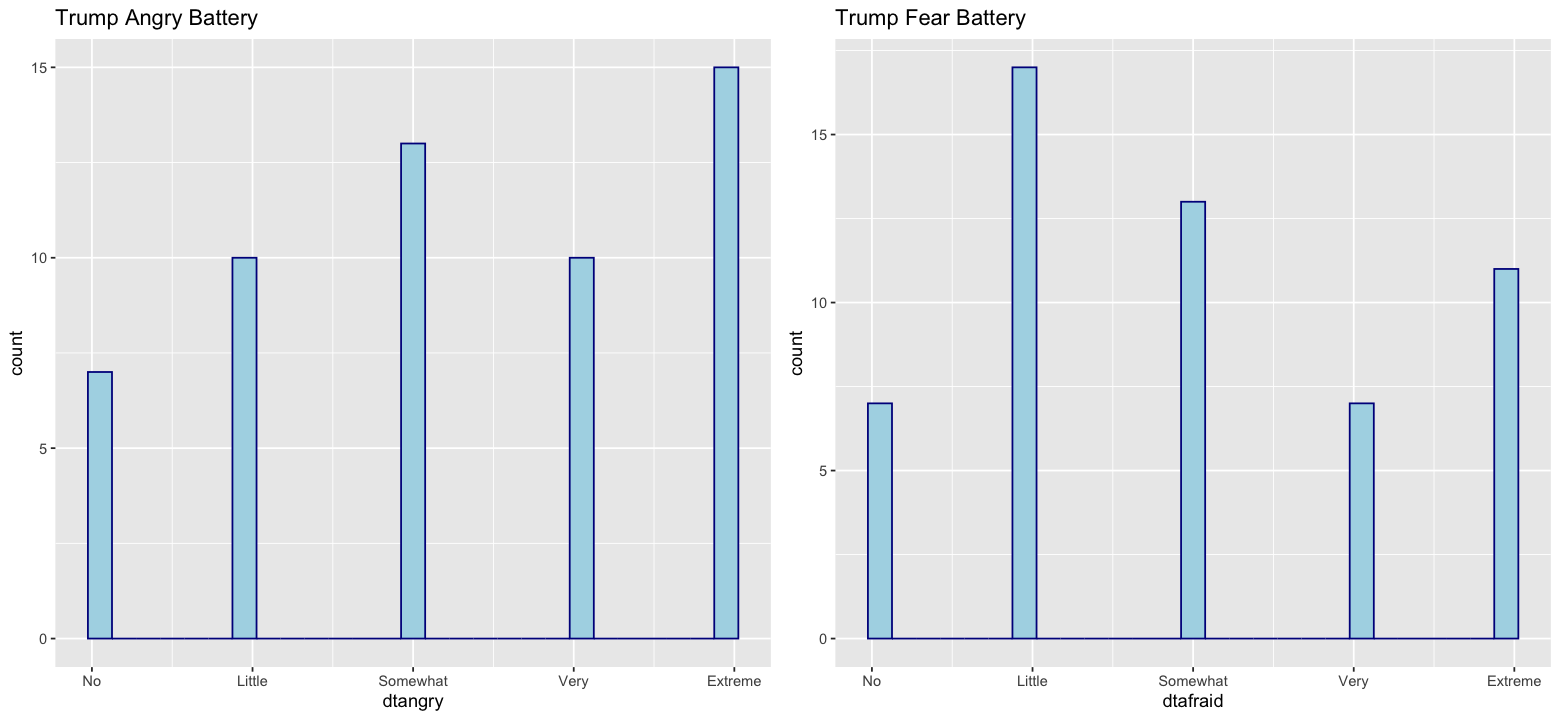

In [38]:
voted18_no16 = subset(A, (A$turnout16 == 2) & (A$turnout18 == 1))

voted18_no16 = subset(voted18_no16, voted18_no16$dtafraid>0)
voted18_no16 = subset(voted18_no16, voted18_no16$dtangry>0)

fig(13,6)
hist_1 <- ggplot(data = voted18_no16) +
  geom_histogram(mapping = aes(x = dtangry), binwidth = 0.15, colour = "darkblue", fill="lightblue") +
  scale_x_continuous("dtangry", breaks = c(1,2,3,4,5), labels = c("1"="No", "2"="Little", "3"="Somewhat", "4"="Very", "5"="Extreme")) +
  labs(title = 'Trump Angry Battery')

  hist_2 <- ggplot(data = voted18_no16) +
  geom_histogram(mapping = aes(x = dtafraid), binwidth = 0.15, colour = "darkblue", fill="lightblue") +
  scale_x_continuous("dtafraid", breaks = c(1,2,3,4,5), labels = c("1"="No", "2"="Little", "3"="Somewhat", "4"="Very", "5"="Extreme")) +
  labs(title = 'Trump Fear Battery')

grid.arrange(hist_1, hist_2, ncol=2)

In [39]:
table = matrix(NA, nrow=3, ncol=2)
colnames(table) = c("Anger", "Fear")
rownames(table) = c("Median", "Skewness","Sample Size")


table[1,1] = format(median(voted18_no16$dtangry), digits=4, nsmall=1)
table[1,2] = format(median(voted18_no16$dtafraid), digits=4, nsmall=1)
table[2,1] = format(skewness(voted18_no16$dtangry), digits=2, nsmall=1)
table[2,2] = format(skewness(voted18_no16$dtafraid), digits=2, nsmall=1)
table[3,1] = format(length(voted18_no16$dtangry), digits=4, nsmall=1)
table[3,2] = format(length(voted18_no16$dtafraid), digits=4, nsmall=1)


kable(table, format="pipe", caption="Anger vs Fear")



Table: Anger vs Fear

|            |Anger |Fear |
|:-----------|:-----|:----|
|Median      |3     |3    |
|Skewness    |-0.19 |0.25 |
|Sample Size |55    |55   |

The histogram and skewness values show some difference in the distribution across the median. 

### Based on your EDA, select an appropriate hypothesis test.  (5 points)
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

Based on the skeness, we see that anger was perhaps more than or equal to fear. We defined our hypothesis test as below. Assuming independent samples, we propose Two sample, One tailed Wilcoxon Rank Sum test to check if one factor has more effect than the other.

 
$H_0 :$  Anger was more than or equal to fear in driving the increase in voter turnout between 2016 and 2018

$H_1 :$  Anger was less than fear in driving the increase in voter turnout between 2016 and 2018



### Conduct your test. (5 points)

In [40]:
wilcox.test(voted18_no16$dtangry, voted18_no16$dtafraid, alternative = "less")


	Wilcoxon rank sum test with continuity correction

data:  voted18_no16$dtangry and voted18_no16$dtafraid
W = 1723.5, p-value = 0.9024
alternative hypothesis: true location shift is less than 0


The p-value is found to be high and statistically not significant. Hence we fail to reject Null Hypothesis $H_0$(Anger was more than or equal to fear in driving the increase in voter turnout between 2016 and 2018) is rejected.

In [41]:
pearson_corr = format(cor(voted18_no16$dtangry, voted18_no16$dtafraid), digits=2, nsmall=1)
print(pearson_corr)

[1] "0.62"


We used correlation to check the effect size and it is found to be large. It implies that practically, there is a large correlation between fear and anger among voters who turned out in 2018.

## Question 5: Select a fifth question that you believe is important for understanding the behavior of voters

### Clearly argue for the relevance of this question.

The research question - Does anti-incumbency always lead to the rejection of the incumbent in the Presidential elections?  

Due to the electoral college, the outcome of Presidential elections depends on how independent or swing voters vote in battleground states. Most Democrats and Republicans vote on party lines, and these swing voters change their voting behavior based on many factors. The swing voters form about 8% of the voting population, and it is important to understand factors that influence their voting behavior.
 The anti-incumbency based on the performance of the President is a big factor that generally influences how people vote. We are going to look into the question - if anti-incumbency always leads to rejection of incumbent in the Presidential elections.
 
 The steps for operationalization are :
 1. Establish swing behavior of independent voters based on their feeling for Trump and Clinton
 2. Infer anti-incumbency based on approval/disproval of Donald Trump's handling his job as President
 3. Check how this anti-incumbency influences their potential voting pattern in 2020
 
 
 The following variables are operationalized 

| Variables | Description | Values 
| --- | --- | --- |
| fttrump/fthrc | Feelings for Trump/Hillary | [1,2,..,100] |
| --- | --- | --- |
| apppres | Approval/Disproval of Trump's job as President  | [1,2,3,4,5] |
| --- | --- | --- |
|  vote20jb/vote20ew | Voting for Trump or Biden/Warren in 2020| [1,2,3,4] |
| --- | --- | --- |
|   pid1r/pid1d | To decide if voter registered as Independent | [1,2,3,4,5] |


 Gaps: 
  1. Not all independent voters are swing voters, and some independent voters have party inclinations
  2. We used less than 5 point difference in median feeling for Trump vs Hillary as swing behavior, i.e., having similar opinion/feeling for both.
  3. We are ignoring the potential exogenous factors that might be in effect, i.e., the gender bias between Biden and Warren.

### Perform EDA and select your hypothesis test 


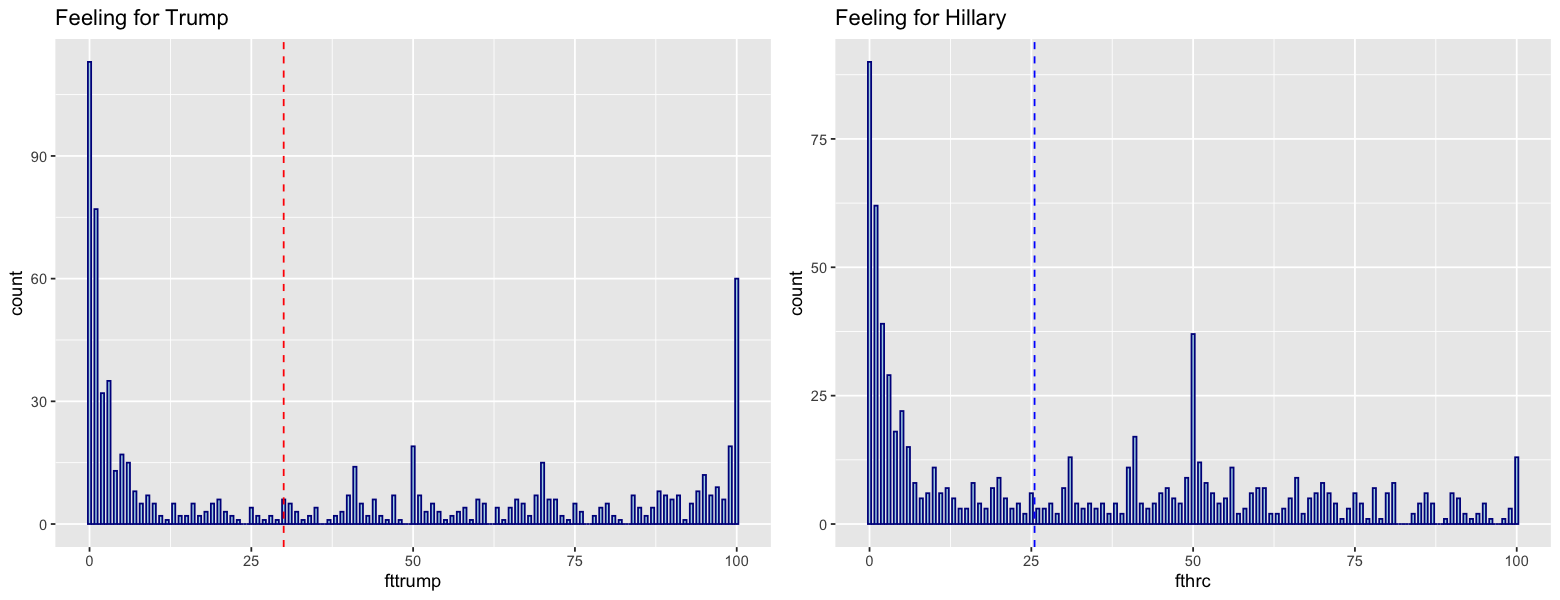

In [42]:

independ = rbind(subset(A, A$pid1r==3), subset(A, A$pid1d==3))
ind_trim = subset(independ, (independ$fthrc < 101) & (independ$fttrump < 101))

fig(13,5)

hist_1 <- ggplot(data = ind_trim) +
  geom_histogram(mapping = aes(x = fttrump), binwidth = 0.5, colour = "darkblue", fill="lightblue") +
  geom_vline(xintercept = median(ind_trim$fttrump), color='red', linetype=2) +
  labs(title = 'Feeling for Trump')

  hist_2 <- ggplot(data = ind_trim) +
  geom_histogram(mapping = aes(x = fthrc), binwidth = 0.5, colour = "darkblue", fill="lightblue") +
  geom_vline(xintercept = median(ind_trim$fthrc), color='blue', linetype=2) +
  labs(title = 'Feeling for Hillary')

 
grid.arrange(hist_1, hist_2, ncol=2)


In [43]:
table = matrix(NA, nrow=3, ncol=2)
colnames(table) = c("Trump", "Hillary")
rownames(table) = c("Median", "Skewness","Sample Size")


table[1,1] = format(median(ind_trim$fttrump), digits=4, nsmall=1)
table[1,2] = format(median(ind_trim$fthrc), digits=4, nsmall=1)
table[2,1] = format(skewness(ind_trim$fttrump), digits=2, nsmall=1)
table[2,2] = format(skewness(ind_trim$fthrc), digits=2, nsmall=1)
table[3,1] = format(length(ind_trim$fttrump), digits=4, nsmall=1)
table[3,2] = format(length(ind_trim$fthrc), digits=4, nsmall=1)


kable(table, format="pipe", caption="Feelings for Trump vs Hillary ")



Table: Feelings for Trump vs Hillary 

|            |Trump |Hillary |
|:-----------|:-----|:-------|
|Median      |30.0  |25.5    |
|Skewness    |0.39  |0.55    |
|Sample Size |760   |760     |

We can see that median difference between Trump and Hillary is less than 5 and comperable skewness.  We did not run any hypothesis tests as it would be too many tests.

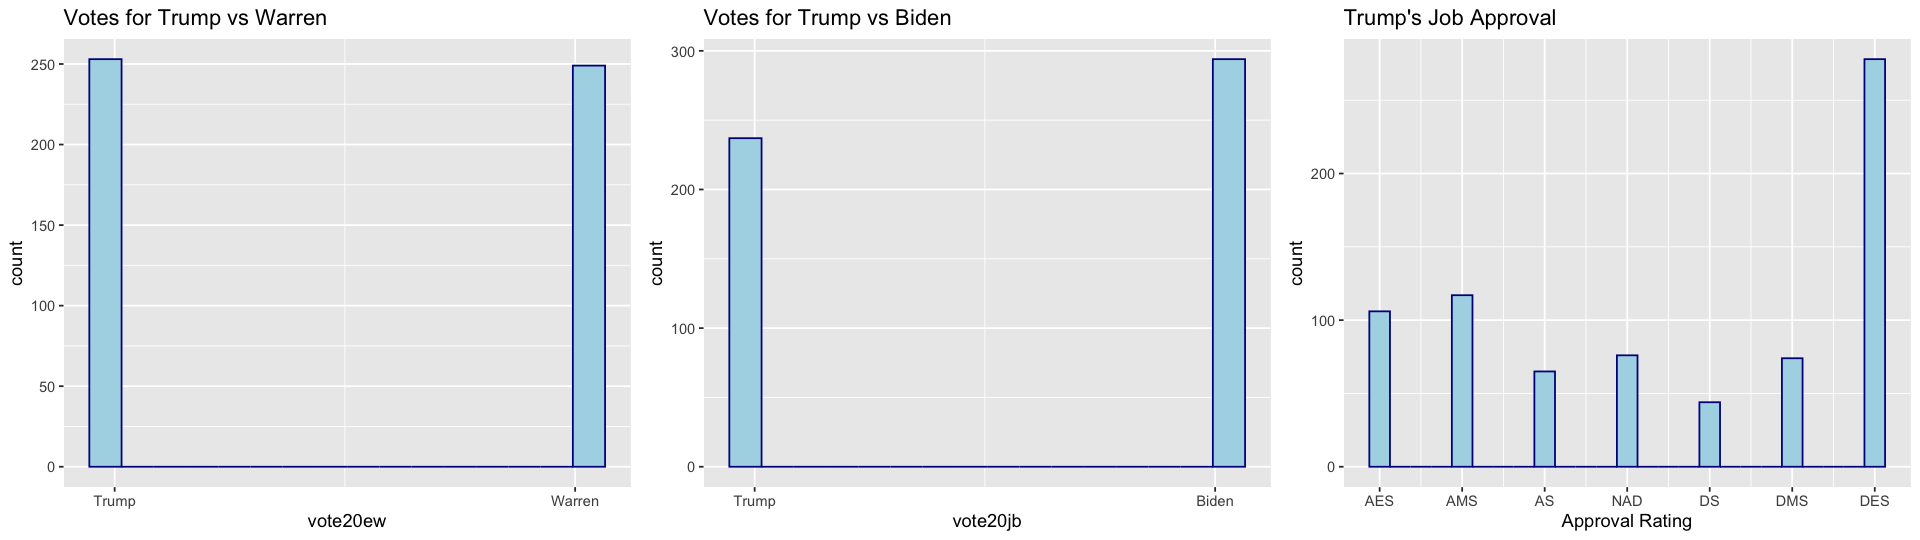

In [44]:

fig(16,4.5)

ew_vs_trump = subset(ind_trim, (ind_trim$vote20ew < 3))
jb_vs_trump = subset(ind_trim, (ind_trim$vote20jb < 3))

  hist_1 <- ggplot(data = ew_vs_trump) +
  geom_histogram(mapping = aes(x = vote20ew), binwidth = 0.07, colour = "darkblue", fill="lightblue") +
  scale_x_continuous(breaks = c(1,2), labels = c("1"="Trump", "2"="Warren")) +
  labs(title = 'Votes for Trump vs Warren')

  hist_2 <- ggplot(data = jb_vs_trump) +
  geom_histogram(mapping = aes(x = vote20jb), binwidth = 0.07, colour = "darkblue", fill="lightblue") +
  scale_x_continuous(breaks = c(1,2), labels = c("1"="Trump", "2"="Biden")) +
  labs(title = 'Votes for Trump vs Biden')

  hist_3 <- ggplot(data = ind_trim) +
  geom_histogram(mapping = aes(x = apppres), binwidth = 0.25, colour = "darkblue", fill="lightblue") +
  scale_x_continuous("Approval Rating", breaks = c(1,2,3,4,5,6,7), labels = c("1"="AES", "2"="AMS", "3"="AS", "4"="NAD", "5"="DS", "6"="DMS", "7"="DES")) +
  labs(title = 'Trump\'s Job Approval ')

grid.arrange(hist_1, hist_2, hist_3, ncol=3)

The histograms show what independent votes responded to the question on how they are likely to vote in 2020 elections and Trump's approval rating.

We are going to use the following Hypothesis for our analysis.

Hypothesis 1:

$H_0: $ Trump has positive or neutral approval among independent voters

$H_1: $ Trump has negative approval(or disaproval) among independent voters

We will use non-parametric One sample Wilcoxon Rank Sum test because approval is an ordinal data and cannot be assumed to be normal. The one sided test is chosen to test for negative approval (disaproval).


Hypothesis 2:

$H_0: $ Trump will get more or equal independent's votes than J.Biden in 2020

$H_1: $ Trump will get less independent's votes than Biden in 2020

Hypothesis 3:

$H_0: $ Trump will get more or equal independent's votes than E.Warren in 2020

$H_1: $ Trump will get less independent's votes than E.Warren in 2020

We will use  non-parametric binomial sign test to check Hypothesis 2 and 3. The onse sided test is chosen to test if Trump gets less votes than J.Biden or E.Warren.

The plan is to check if negative approval rating of Trump impacts his winning chances against J.Biden and E.Warren.



### Conduct your test


In [45]:
wilcox.test(ind_trim$apppres, mu=4, alternative = "greater")



	Wilcoxon signed rank test with continuity correction

data:  ind_trim$apppres
V = 154505, p-value = 5.921e-14
alternative hypothesis: true location is greater than 4


The p-value of 5.921e-14 is statistically significant and we reject the null hypothesis of Trump has positive or neutral approval among independent voters.

In [46]:
wilcox_effsize(ind_trim, apppres~1, mu=4,alternative = "less")

,.y.,group1,group2,effsize,n,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<ord>
1,apppres,1,null model,0.253338,760,small


The Wilcox Effect Size of 0.25 is considered small but we would say it is marginally medium as it is close to 0.3

In [47]:
a = length(jb_vs_trump$vote20jb[jb_vs_trump$vote20jb==1])
b = length(jb_vs_trump$vote20jb)
binom.test(x=a, n=b, p=0.5, alternative="less")


	Exact binomial test

data:  a and b
number of successes = 237, number of trials = 531, p-value = 0.007506
alternative hypothesis: true probability of success is less than 0.5
95 percent confidence interval:
 0.0000000 0.4829109
sample estimates:
probability of success 
             0.4463277 


The lower p-value indicates that we can reject the Null Hypothesis $H_0: $ Trump will get more or equal independent's votes than Biden in 2020

In [48]:
a = length(ew_vs_trump$vote20ew[ew_vs_trump$vote20ew==1])
b = length(ew_vs_trump$vote20ew)
binom.test(x=a, n=b, p=0.5, alternative="less")


	Exact binomial test

data:  a and b
number of successes = 253, number of trials = 502, p-value = 0.5883
alternative hypothesis: true probability of success is less than 0.5
95 percent confidence interval:
 0.0000000 0.5415962
sample estimates:
probability of success 
             0.5039841 


The p-value of 0.58 indicates that we fail to reject the Null Hypothesis $H_0: $ Trump will get more or equal independent's votes than E.Warren in 2020.

### Conclusion 
We summarize three hypotheses below.

1. Reject the  Null Hypothesis that Trump has positive or neutral approval among independent voters
2. Reject the Null Hypothesis that Trump will get more or equal independent's votes than Biden in 2020
3. We fail to reject the Null Hypothesis that Trump will get more or equal independent's votes than E.Warren in 2020.

So, we can clearly show that anti-incumbency alone is not enough to defeat the incumbent in the Presidential Election. A strong alternate is needed to challenge the incumbent.